# Comparison of Google distance matrix API and DUAROUTER 

### Importing libraries & reading API Key

In [1]:
import requests
import os
import xml.etree.ElementTree as ET
import sumolib
import json
import pandas as pd
from shapely.geometry import Point

endpoint = 'https://maps.googleapis.com/maps/api/distancematrix/json'

API_KEY = os.getenv('API_KEY')


### Reading trips and network

In [2]:
# reading xml of trips
tree = ET.parse('ulb/trips.trips.xml')
root = tree.getroot()

net = sumolib.net.readNet('ulb/ulb.net.xml')

In [3]:
root[0].attrib

{'id': '0', 'depart': '0.00', 'from': '30089441#2', 'to': '-14442490#2'}

In [4]:
data_trips = {}
for trip in root:
    data_trips[trip.attrib['id']] = {'depart' : trip.attrib['depart'], 'from' : trip.attrib['from'], 'to' : trip.attrib['to']}
data_trips

{'0': {'depart': '0.00', 'from': '30089441#2', 'to': '-14442490#2'},
 '1': {'depart': '1.00', 'from': '-525316189#1', 'to': '-36773133'},
 '2': {'depart': '2.00', 'from': '34633121#0', 'to': '31428753#0'},
 '3': {'depart': '3.00', 'from': '571388040#0', 'to': '-171958610'},
 '4': {'depart': '4.00', 'from': '147714193#0', 'to': '-14456417#2'},
 '5': {'depart': '5.00', 'from': '-35692062#3', 'to': '180217801#1'},
 '6': {'depart': '6.00', 'from': '-14453580#2', 'to': '-33877541#1'},
 '7': {'depart': '7.00', 'from': '30601140#2', 'to': '23147770#0'},
 '8': {'depart': '8.00', 'from': '-35736877#1', 'to': '237825891#0'},
 '9': {'depart': '9.00', 'from': '40793692#2', 'to': '-1077835592#0'},
 '10': {'depart': '10.00', 'from': '40742591#15', 'to': '32922512#1'},
 '11': {'depart': '11.00', 'from': '1071065280', 'to': '-30105061#1'},
 '12': {'depart': '12.00', 'from': '830745951#1', 'to': '1077835592#0'},
 '13': {'depart': '13.00', 'from': '-189538727', 'to': '-220267250#1'},
 '14': {'depart': '

In [64]:
data_trips['0']

def find_trip_id(fromLane, toLane):
    for trip in data_trips:
        if data_trips[trip]['from'] == fromLane and data_trips[trip]['to'] == toLane:
            return trip
    return None


In [65]:
find_trip_id('-525316189#1', '-36773133')

'1'

### Creating the origin and destination lists of geocoordinates

In [5]:
def getGeocoordinates(coord):
    '''
    Returns the geocoordinates of the sumo network coordinates
    '''
    #geocoordinates = []
    point = Point(coord)
    lon, lat = net.convertXY2LonLat(point.x, point.y)
    return str(lat) + "," + str(lon)
    #geocoordinates.append((lat, lon))
    #return geocoordinates


In [6]:
origins=[]
destinations=[]
for trip in data_trips:
    fromShape = net.getEdge(data_trips[trip]['from']).getShape()
    toShape = net.getEdge(data_trips[trip]['to']).getShape()
    
    origins.append( getGeocoordinates(fromShape[0]))
    destinations.append( getGeocoordinates(toShape[0]))

print(origins)
print(destinations)

['50.83437543889532,4.420823821234167', '50.813793657188114,4.434500118795244', '50.81769942844321,4.4288976024538576', '50.82001039577483,4.466606804332374', '50.802394911278995,4.39780437403715', '50.83757305571695,4.380394769784555', '50.82987081201179,4.414923043634739', '50.83240648393718,4.391842089629454', '50.80654849181126,4.419394280293695', '50.795382228213136,4.37353679954569', '50.806539667970064,4.371637096242884', '50.82664021120167,4.3876553523582205', '50.82040707063207,4.374739588178312', '50.83472990543388,4.4434378524593265', '50.81012717242232,4.397394012061541', '50.82102218290476,4.4026843005759835', '50.81732317104596,4.4218885717425405', '50.83317926870989,4.386041037039449', '50.819048263125545,4.429190200397015', '50.81655046040191,4.38205516513725', '50.80246084519816,4.409834373700569', '50.82252358726541,4.416067917474153', '50.80967652430081,4.3887102772346545', '50.818469816164686,4.41709224797644', '50.83936305692909,4.399113797582186', '50.836798024594

In [7]:
#problematic edges 
a= net.getEdge('-525316189#1').getShape()

In [8]:
geocoordinates = []
for coord in a:
    point = Point(coord)
    lon, lat = net.convertXY2LonLat(point.x, point.y)
    geocoordinates.append((lat, lon))
print(geocoordinates)

[(50.813793657188114, 4.434500118795244), (50.81410933411599, 4.433987256381771)]


In [9]:
origins

['50.83437543889532,4.420823821234167',
 '50.813793657188114,4.434500118795244',
 '50.81769942844321,4.4288976024538576',
 '50.82001039577483,4.466606804332374',
 '50.802394911278995,4.39780437403715',
 '50.83757305571695,4.380394769784555',
 '50.82987081201179,4.414923043634739',
 '50.83240648393718,4.391842089629454',
 '50.80654849181126,4.419394280293695',
 '50.795382228213136,4.37353679954569',
 '50.806539667970064,4.371637096242884',
 '50.82664021120167,4.3876553523582205',
 '50.82040707063207,4.374739588178312',
 '50.83472990543388,4.4434378524593265',
 '50.81012717242232,4.397394012061541',
 '50.82102218290476,4.4026843005759835',
 '50.81732317104596,4.4218885717425405',
 '50.83317926870989,4.386041037039449',
 '50.819048263125545,4.429190200397015',
 '50.81655046040191,4.38205516513725',
 '50.80246084519816,4.409834373700569',
 '50.82252358726541,4.416067917474153',
 '50.80967652430081,4.3887102772346545',
 '50.818469816164686,4.41709224797644',
 '50.83936305692909,4.3991137975

In [10]:
destinations

['50.830584308601935,4.397308006346473',
 '50.82287523928125,4.418716841964817',
 '50.81766330458234,4.405068895870757',
 '50.83505234427359,4.396550565597335',
 '50.82162168157847,4.424324278785643',
 '50.817347998790986,4.483010820706597',
 '50.82617081575864,4.454339472282124',
 '50.83841525785151,4.463838892625032',
 '50.81200585464729,4.427463142681984',
 '50.82808763089034,4.39037149049844',
 '50.80978155877299,4.422159345045173',
 '50.836470664099714,4.4217348969589665',
 '50.82758439585621,4.390444434555247',
 '50.8179584186898,4.385939306805768',
 '50.830253165824466,4.46969027608071',
 '50.82557040982789,4.483892412383143',
 '50.80756051937103,4.3913337739148615',
 '50.83572440821074,4.43922114195962',
 '50.82119598162899,4.417142689785012',
 '50.83677227751518,4.408039280759583',
 '50.81254736844388,4.417593509392381',
 '50.82489030819377,4.399459631569576',
 '50.79182190714367,4.4196415553215',
 '50.80428528605225,4.38892241028651',
 '50.83679802459434,4.387021683228787',
 

In [11]:
# examples 
origins = [
    '50.85045,4.34878',  # Grand Place, Brussels
    '51.21944,4.40246',  # Antwerp Central Station
    '51.22172,4.41539',  # Rubenshuis, Antwerp
]

destinations = [
    '50.89504,4.34134',  # Atomium, Brussels
    '51.21291,4.42549',  # MAS Museum, Antwerp
    '51.21762,4.41594',  # Cathedral of Our Lady, Antwerp
]


In [12]:
origins[:5]

['50.85045,4.34878', '51.21944,4.40246', '51.22172,4.41539']

## Call to the Google distance matrix API

In [13]:
# API parameters
params = {
    'origins': origins[:5],
    'destinations':destinations[:5],
    'key': API_KEY
}

response = requests.get(endpoint, params=params)

if response.status_code == 200:
    data_trips = response.json()
    rows = data_trips['rows']
    for row in rows:
        elements = row['elements']
        for element in elements:
            distance = element['distance']['text']
            duration = element['duration']['text']
            print(f"Distance: {distance}")
            print(f"Duration: {duration}")
else:
    print("fail")

In [14]:
data_trips

{'destination_addresses': [],
 'error_message': 'You must enable Billing on the Google Cloud Project at https://console.cloud.google.com/project/_/billing/enable Learn more at https://developers.google.com/maps/gmp-get-started',
 'origin_addresses': [],
 'rows': [],
 'status': 'REQUEST_DENIED'}

# Analyzing the data

Reading in the googel api results and the sumo run results

In [15]:
with open('google_api.json') as f:
    data_google = json.load(f)


In [16]:
data_google

[{'destination_addresses': ['Rue Général Fivé 76, 1040 Etterbeek, Belgium'],
  'origin_addresses': ['N3 327, 1150 Woluwe-Saint-Pierre, Belgium'],
  'rows': [{'elements': [{'distance': {'text': '2.4 km', 'value': 2425},
      'duration': {'text': '7 mins', 'value': 442},
      'status': 'OK'}]}],
  'status': 'OK'},
 {'destination_addresses': ['Kwikstaartlaan 10, 1150 Sint-Pieters-Woluwe, Belgium'],
  'origin_addresses': ['Av. Herrmann-Debroux 54, 1160 Auderghem, Belgium'],
  'rows': [{'elements': [{'distance': {'text': '2.1 km', 'value': 2105},
      'duration': {'text': '6 mins', 'value': 384},
      'status': 'OK'}]}],
  'status': 'OK'},
 {'destination_addresses': ['R. Jules Cockx 26, 1160 Auderghem, Belgium'],
  'origin_addresses': ['Zandgroeflaan 8, 1160 Oudergem, Belgium'],
  'rows': [{'elements': [{'distance': {'text': '2.1 km', 'value': 2083},
      'duration': {'text': '7 mins', 'value': 418},
      'status': 'OK'}]}],
  'status': 'OK'},
 {'destination_addresses': ['Edouard de T

In [17]:
#read the json file od_file.json
with open('od_file.json') as f:
    data_od = json.load(f)
    


In [18]:
coord= [[data_od[0]["origins"][i], data_od[1]["destinations"][i]] for i in range(len(data_od[0]["origins"])) ]

In [19]:
coord

[['50.83437543889532,4.420823821234167',
  '50.830584308601935,4.397308006346473'],
 ['50.813793657188114,4.434500118795244',
  '50.82287523928125,4.418716841964817'],
 ['50.81769942844321,4.4288976024538576',
  '50.81766330458234,4.405068895870757'],
 ['50.82001039577483,4.466606804332374',
  '50.83505234427359,4.396550565597335'],
 ['50.802394911278995,4.39780437403715',
  '50.82162168157847,4.424324278785643'],
 ['50.83757305571695,4.380394769784555',
  '50.817347998790986,4.483010820706597'],
 ['50.82987081201179,4.414923043634739',
  '50.82617081575864,4.454339472282124'],
 ['50.83240648393718,4.391842089629454',
  '50.83841525785151,4.463838892625032'],
 ['50.80654849181126,4.419394280293695',
  '50.81200585464729,4.427463142681984'],
 ['50.795382228213136,4.37353679954569', '50.82808763089034,4.39037149049844'],
 ['50.806539667970064,4.371637096242884',
  '50.80978155877299,4.422159345045173'],
 ['50.82664021120167,4.3876553523582205',
  '50.836470664099714,4.4217348969589665'],

In [20]:



data_od[1]  


{'destinations': ['50.830584308601935,4.397308006346473',
  '50.82287523928125,4.418716841964817',
  '50.81766330458234,4.405068895870757',
  '50.83505234427359,4.396550565597335',
  '50.82162168157847,4.424324278785643',
  '50.817347998790986,4.483010820706597',
  '50.82617081575864,4.454339472282124',
  '50.83841525785151,4.463838892625032',
  '50.81200585464729,4.427463142681984',
  '50.82808763089034,4.39037149049844',
  '50.80978155877299,4.422159345045173',
  '50.836470664099714,4.4217348969589665',
  '50.82758439585621,4.390444434555247',
  '50.8179584186898,4.385939306805768',
  '50.830253165824466,4.46969027608071',
  '50.82557040982789,4.483892412383143',
  '50.80756051937103,4.3913337739148615',
  '50.83572440821074,4.43922114195962',
  '50.82119598162899,4.417142689785012',
  '50.83677227751518,4.408039280759583',
  '50.81254736844388,4.417593509392381',
  '50.82489030819377,4.399459631569576',
  '50.79182190714367,4.4196415553215',
  '50.80428528605225,4.38892241028651',
 

In [21]:
# reading xml of trips
tree_out = ET.parse('output.xml')
root_out = tree_out.getroot()

root_out

<Element 'tripinfos' at 0x119ba3510>

In [22]:
#what info is contained in root
root_out[1].attrib


{'id': '8',
 'depart': '8.00',
 'departLane': '-35736877#1_0',
 'departPos': '5.10',
 'departSpeed': '0.00',
 'departDelay': '0.00',
 'arrival': '163.00',
 'arrivalLane': '237825891#0_1',
 'arrivalPos': '121.61',
 'arrivalSpeed': '12.98',
 'duration': '155.00',
 'routeLength': '1308.47',
 'waitingTime': '0.00',
 'waitingCount': '0',
 'stopTime': '0.00',
 'timeLoss': '16.50',
 'rerouteNo': '0',
 'devices': 'tripinfo_8',
 'vType': 'DEFAULT_VEHTYPE',
 'speedFactor': '0.94',
 'vaporized': ''}

In [24]:
data_out = {}
for trip in root_out:
    if int(trip.attrib['id']) < 100:
        data_out[int(trip.attrib['id'])] = {'departLane' : trip.attrib['departLane'], 'arrivalLane' : trip.attrib['arrivalLane'] , 'duration' : trip.attrib['duration'], 'routeLength' : trip.attrib["routeLength"]}
data_out

{8: {'departLane': '-35736877#1_0',
  'arrivalLane': '237825891#0_1',
  'duration': '155.00',
  'routeLength': '1308.47'},
 24: {'departLane': '29063029#2_0',
  'arrivalLane': '141632618#3_0',
  'duration': '167.00',
  'routeLength': '999.59'},
 74: {'departLane': '-33685256#0_0',
  'arrivalLane': '-885889666#1_0',
  'duration': '168.00',
  'routeLength': '1735.48'},
 20: {'departLane': '32971558#2_0',
  'arrivalLane': '-147759792#8_0',
  'duration': '229.00',
  'routeLength': '1728.50'},
 18: {'departLane': '42015843#2_0',
  'arrivalLane': '260459159#2_0',
  'duration': '238.00',
  'routeLength': '1590.97'},
 21: {'departLane': '-36773134#1_0',
  'arrivalLane': '-746460197#2_0',
  'duration': '235.00',
  'routeLength': '1768.07'},
 0: {'departLane': '30089441#2_0',
  'arrivalLane': '-14442490#2_0',
  'duration': '263.00',
  'routeLength': '2813.66'},
 2: {'departLane': '34633121#0_0',
  'arrivalLane': '31428753#0_1',
  'duration': '267.00',
  'routeLength': '3025.55'},
 38: {'departLa

In [26]:
#sort dictionnary by key

data_out = {k: v for k, v in sorted(data_out.items(), key=lambda item: item[0])}
data_out

{0: {'departLane': '30089441#2_0',
  'arrivalLane': '-14442490#2_0',
  'duration': '263.00',
  'routeLength': '2813.66'},
 1: {'departLane': '-525316189#1_0',
  'arrivalLane': '-36773133_0',
  'duration': '299.00',
  'routeLength': '2212.05'},
 2: {'departLane': '34633121#0_0',
  'arrivalLane': '31428753#0_1',
  'duration': '267.00',
  'routeLength': '3025.55'},
 3: {'departLane': '571388040#0_0',
  'arrivalLane': '-171958610_0',
  'duration': '593.00',
  'routeLength': '6717.50'},
 4: {'departLane': '147714193#0_0',
  'arrivalLane': '-14456417#2_0',
  'duration': '547.00',
  'routeLength': '5050.46'},
 5: {'departLane': '-35692062#3_0',
  'arrivalLane': '180217801#1_1',
  'duration': '1041.00',
  'routeLength': '9664.66'},
 6: {'departLane': '-14453580#2_0',
  'arrivalLane': '-33877541#1_0',
  'duration': '436.00',
  'routeLength': '4259.73'},
 7: {'departLane': '30601140#2_0',
  'arrivalLane': '23147770#0_0',
  'duration': '742.00',
  'routeLength': '6761.21'},
 8: {'departLane': '-3

In [27]:
data_out

{0: {'departLane': '30089441#2_0',
  'arrivalLane': '-14442490#2_0',
  'duration': '263.00',
  'routeLength': '2813.66'},
 1: {'departLane': '-525316189#1_0',
  'arrivalLane': '-36773133_0',
  'duration': '299.00',
  'routeLength': '2212.05'},
 2: {'departLane': '34633121#0_0',
  'arrivalLane': '31428753#0_1',
  'duration': '267.00',
  'routeLength': '3025.55'},
 3: {'departLane': '571388040#0_0',
  'arrivalLane': '-171958610_0',
  'duration': '593.00',
  'routeLength': '6717.50'},
 4: {'departLane': '147714193#0_0',
  'arrivalLane': '-14456417#2_0',
  'duration': '547.00',
  'routeLength': '5050.46'},
 5: {'departLane': '-35692062#3_0',
  'arrivalLane': '180217801#1_1',
  'duration': '1041.00',
  'routeLength': '9664.66'},
 6: {'departLane': '-14453580#2_0',
  'arrivalLane': '-33877541#1_0',
  'duration': '436.00',
  'routeLength': '4259.73'},
 7: {'departLane': '30601140#2_0',
  'arrivalLane': '23147770#0_0',
  'duration': '742.00',
  'routeLength': '6761.21'},
 8: {'departLane': '-3

In [28]:
data_google

[{'destination_addresses': ['Rue Général Fivé 76, 1040 Etterbeek, Belgium'],
  'origin_addresses': ['N3 327, 1150 Woluwe-Saint-Pierre, Belgium'],
  'rows': [{'elements': [{'distance': {'text': '2.4 km', 'value': 2425},
      'duration': {'text': '7 mins', 'value': 442},
      'status': 'OK'}]}],
  'status': 'OK'},
 {'destination_addresses': ['Kwikstaartlaan 10, 1150 Sint-Pieters-Woluwe, Belgium'],
  'origin_addresses': ['Av. Herrmann-Debroux 54, 1160 Auderghem, Belgium'],
  'rows': [{'elements': [{'distance': {'text': '2.1 km', 'value': 2105},
      'duration': {'text': '6 mins', 'value': 384},
      'status': 'OK'}]}],
  'status': 'OK'},
 {'destination_addresses': ['R. Jules Cockx 26, 1160 Auderghem, Belgium'],
  'origin_addresses': ['Zandgroeflaan 8, 1160 Oudergem, Belgium'],
  'rows': [{'elements': [{'distance': {'text': '2.1 km', 'value': 2083},
      'duration': {'text': '7 mins', 'value': 418},
      'status': 'OK'}]}],
  'status': 'OK'},
 {'destination_addresses': ['Edouard de T

In [40]:
#check if index exists in data_out
if 101 in  data_out:
    print("yes")
else:
    pass


In [49]:
durations_sumo =[]
durations_google=[]
lengths_sumo =[]
lenghts_google =[]

for i in range(len(data_google)):
    if i in data_out:
        durations_sumo.append(data_out[i]['duration'])
        lengths_sumo.append(data_out[i]['routeLength'])
        durations_google.append(data_google[i]['rows'][0]['elements'][0]['duration']['value'])
        lenghts_google.append(data_google[i]['rows'][0]['elements'][0]['distance']['value'])
    else:
        durations_sumo.append(0)
        lengths_sumo.append(0)
        durations_google.append(data_google[i]['rows'][0]['elements'][0]['duration']['value'])
        lenghts_google.append(data_google[i]['rows'][0]['elements'][0]['distance']['value'])


In [68]:
lengths_sumo

['2813.66',
 '2212.05',
 '3025.55',
 '6717.50',
 '5050.46',
 '9664.66',
 '4259.73',
 '6761.21',
 '1308.47',
 '5145.83',
 '6298.67',
 '4153.82',
 '2076.41',
 '6517.26',
 '8512.63',
 '7539.36',
 '3077.35',
 '4939.91',
 '1590.97',
 '3420.58',
 '1728.50',
 '1768.07',
 '3794.22',
 '3453.96',
 '999.59',
 '4593.03',
 '3763.34',
 '7907.15',
 '8789.90',
 '7890.70',
 '2075.77',
 '3585.56',
 '5832.65',
 '3640.43',
 '5060.04',
 0,
 '7946.20',
 '3239.44',
 '2208.72',
 '3799.01',
 '6605.90',
 '7081.45',
 '2104.98',
 0,
 '3809.05',
 '9983.86',
 '6077.14',
 '2118.98',
 '4316.25',
 '3855.86',
 '3281.42',
 '6759.95',
 '6143.89',
 '5271.92',
 '5286.01',
 '3716.99',
 '5776.21',
 '6559.90',
 '10630.39',
 '12213.65',
 '3847.81',
 '6022.67',
 0,
 '2098.82',
 '5626.22',
 '3532.18',
 '5535.51',
 '5119.45',
 '1330.69',
 '6480.13',
 '8096.96',
 '3560.30',
 '5986.77',
 0,
 '1735.48',
 0,
 '7606.21',
 '5836.44',
 '2256.14',
 '3223.90',
 '6754.97',
 '6797.09',
 '5589.65',
 '7050.06',
 '3148.93',
 '9391.33',
 '5812.

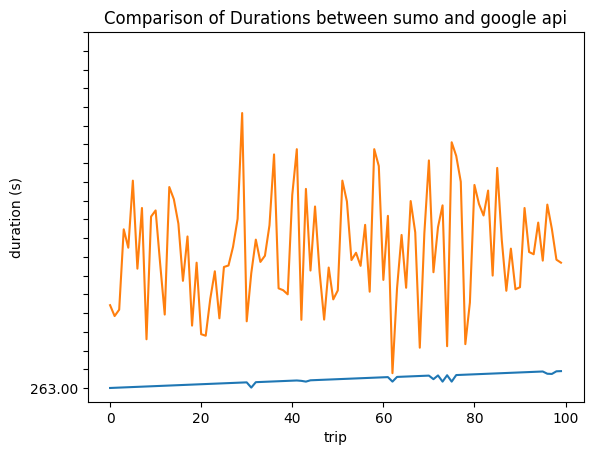

In [67]:
import matplotlib.pyplot as plt
import numpy as np


t = np.arange(0.0, 100.0, 1)
s = durations_sumo
g = durations_google

plt.plot(t, s)
plt.plot(t, g)
#y ticks
plt.yticks(np.arange(0, 2000, 100))

plt.xlabel('trip')
plt.ylabel('duration (s)')
plt.title('Comparison of Durations between sumo and google api')
         
plt.savefig("duration_comparison.png")
plt.show()




